<a href="https://colab.research.google.com/github/sakuragi-zero/yatteiki/blob/master/statistics/Chapter1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q japanize_matplotlib

     |████████████████████████████████| 4.1 MB 19.6 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.font_manager import FontProperties
import japanize_matplotlib

# **Part1**：**データの種類とグラフ表現**  
**この章での目標**  
質的変数と量的変数の違いを理解する  
質的変数の集計やグラフ表現を理解する  
クロス集計を理解する  
さまざまなグラフの特徴を理解し結果を解釈できる  
分析の目的に合わせて適切なグラフを適応できる  
時系列データの特徴を理解し、時間的な推移を理解できる  
時系列データを適切にグラフに表すことができる  
指数を用意て時系列データを解釈できる  

# データの種類  

**質的変数**：カテゴリー  
名義尺度：カテゴリー間に順序がない  
順序尺度：カテゴリー間に順序がある  
**量的変数**：数値  
間隔尺度：数値との間隔に意味がある、西暦など  
比例尺度：数値を数式で導くことができる  
**離散変数**：整数  
**連続変数**：少数点込み  
**多変量データ**：2つ以上の変数を同時に扱う。身長と体重の同時測定  
**時系列データ**：1つの変数に対して時間の変化による数値の変化に注目する  
**パネルデータ**：複数の同一個体(同じ条件下)を複数時点にわたって観測されたデータ  
**クロスセクションデータ**：ある時点での異なるデータを横断的に集めたデータ  


# 質的変数の要約  
**度数、頻度**：それぞれのカテゴリに属する観測値の個数  
**クロス集計**：複数の項目を組み合わせて集計する

In [ ]:
data = pd.DataFrame(data={
  '支持政党': ['自民党','立憲民主党','公明党','共産党','日本維新の会','国民民主党','社民党','その他','支持なし','わからない・無回答','合計'],
  '度数':     [689,    124,       99,    60,     47,          33,        10,     21,    812,      165,              2060]
},
index = ['自民党','立憲民主党','公明党','共産党','日本維新の会','国民民主党','社民党','その他','支持なし','わからない・無回答','合計'],
columns = ['支持政党','度数'])
df=data.style.hide_index()
df
#今回は後のグラフのことを考えてindexの指定とstyle.hide_indexを使用している

支持政党,度数
自民党,689
立憲民主党,124
公明党,99
共産党,60
日本維新の会,47
国民民主党,33
社民党,10
その他,21
支持なし,812
わからない・無回答,165


棒グラフ


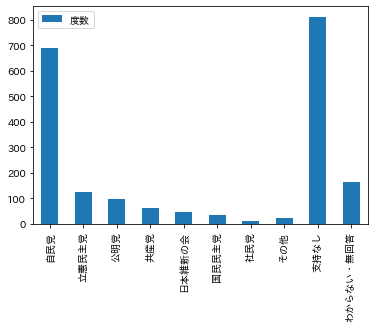

In [ ]:
print("棒グラフ")
data[:10].plot.bar(
  y='度数'
)

# グラフによるデータの集約  
**幹葉図**：データの大きさnが小さい時に使われる。ヒストグラムを縦にした感じ  
**棒グラフ**：量の大小を比較する。棒の高さでそれぞれのカテゴリの量を表す  
**円グラフ**：それぞれのカテゴリの全体に対する割合を表す  
**帯グラフ**：内容は円グラフと同じ。複数のグループを比較したい時に使う  
**折線グラフ**：数量の時間的変化を表す  
**レーダーチャート**：複数の値をまとめて表現する

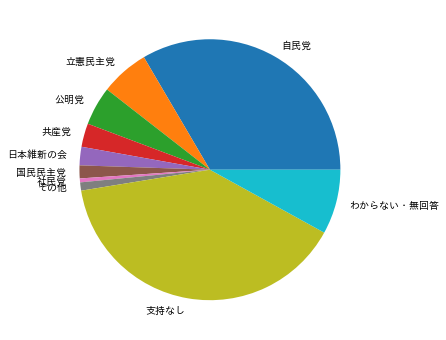

In [ ]:
data[:10].plot.pie(y='度数', figsize=(6, 6),ylabel='',fontsize=10,legend=False)#legend=Falseで凡例を消す

# グラフ表現の工夫と注意点  
**雨温図**：気温を折線グラフで表し降水量を棒グラフで表す  
**積み上げ棒グラフ**：地層に似たグラフ。複数のカテゴリを並べ各度数を縦に積み上げる  
**複数の帯グラフ**：帯グラフを並べて比較する  
**誤解を招きやすいグラフ表現**：目盛りの縦軸が0から始まっていない

# 時系列データの要約  
**時系列データのグラフ表現**：折線グラフを使って表す  
**変化率**：現時点の値 - 前時点の値 / 前時点の値  


# 時系列グラフ作成上の注意点
**時間間隔に注意を払う**：時間の間隔によってグラフの見え方が違う  
**時系列データに対数を利用する**：データを変換して対数変換する。縦軸を0〜300→0〜30  

# **Part2**：量的変数の要約方法  
**この章での目標**  
連続的な量的変数について、度数分布表の作成と意味を理解する  
ヒストグラムの作成方法と意味を理解する  
度数分布やヒストグラムを用いて、分布の様子を調べる  
相対度数と累積相対度数の関係を理解する  
データの分布の特徴を表す5つの数値を求め分布を要約する  
箱ひげ図で分布の情報を理解し、異なる集団の分布を比較する  
データの散らばりの尺度を理解し、データの散らばりを把握する  


# 度数分布表の作成  

**階級**：変数が取る値の範囲をグループ分けした、それぞれの区間  
**階級の度数、頻度**：階級に含まれる観測値の個数  
**度数分布**：階級ごとに度数を整理したもの  
**度数分布表**：度数分布を表にしたもの  
**階級の代表値、階級値**：各階級を代表する値、平均値や中央値などが多い  
**相対度数**：各階級の度数の全体に対する割合。階級の度数 / 度数の合計  
**累積相対度数**：度数または相対度数を小さい階級から合計して得られる  

# ヒストグラムと度数分布多角形  
**ヒストグラム**：度数分布をグラフ化する。面積が度数と比例する  

# 分布の特徴の把握  
**正規分布**：左右対称の分布  
**外れ値**：極端に大きい値や極端に小さな値  

# 分位数と5数要約  

**分位数**：データを小さい順に並べ替えてデータの数で等分した時の区切りの値  
**四分位数**：分位数を求める時に四等分する。第1四分位数(Q1)と表す  
**累積度数分布**：度数を累積(積み上げて)100%に近づいていくグラフ  
**5数要約**：最小値、最大値、第1四分位数、第2四分位数、第3四分位数  
**第1四分位数**：第2四分位数から最小値までの範囲の中央値。**全体の25%**  
**第2四分位数**：最小値から最大値までの範囲の中央値。**全体の50%**  
**第3四分位数**：第2四分位数から最大値までの範囲の中央値。**全体の75%**  
**四分位範囲**：第3四分位数 - 第1四分位数(Q3 - Q1)値が大きいほど観測値が散らばっている  

# 箱ひげ図  
**箱ひげ図**：5要約数を図にしたもの。四分位範囲が箱の形をしている  


# **Part3**：1変数データの分析 
**この章での目標**  
分布の位置を表す代表値の意味を理解する  
3つの位置の代表値の適切な使い方を理解する  
位置の代表値を用いて分布の様子を把握する  
個々の観測値の散らばりの程度の概念を理解する  
データの散らばりの程度を表す尺度を求める  
散らばりの尺度を用いて分布の特徴を把握する  

# 位置に関する代表値  

**平均値**：広く用いられる位置の代表値。外れ値の影響を受けやすい  
$$
\bar{x}=\frac{観測値の合計}{観測値の個数}=\frac{x_1+x_2+x_3+x_n}{n}=\frac{1}{n}=\sum_{i=1}^n{x_i}
$$
**中央値**：観測値を大きい順に並べた時に真ん中に位置する観測値。  
外れ値の影響を受けにくい。観測値が偶数の場合は真ん中2つの平均を取る  
**最頻値**：最も頻繁に出現する値。最頻値はヒストグラムで最も高くなる  
**3つの位置の代表値の大小関係**：右の裾が長い分布では最頻値＜中央値＜平均値  

**度数分布表からの平均値の計算**：個々の観測値を特定できず度数分布だけが  
与えられた場合、平均値を求めたいことがある。  
それぞれの階級で代表値 × 度数を計算し  
その合計を度数の合計で割ったものを平均値とする  
階級の数をk、各階級の代表値をm1,m2,m3...,度数をf1,f2,f3...  

データの大きさは  
$$
n=f_1+f_2+f_3...+f_k=\sum_{j=1}^k{f_j}
$$  

であり度数分布から求めた平均値は  
$$
\frac{m_1f_1+m_2f_2+...+m_k}{n}=\frac{\displaystyle \sum_{j=1}^k{m_jf_j}}{\displaystyle \sum_{j=1}^k{f_j}}
$$  
このようにして計算した平均値は個々の観測値が利用できる場合の平均値の近似である

# 観測値の散らばりの尺度  

**偏差**：平均からどれだけ離れているか。偏差の合計と平均は常に0  
$$
偏差=観測値-平均値={x_i}-\bar{x}
$$  
**平均偏差**：データ全体の散らばりを考える時に偏差の絶対値の平均値を取る  
$$
\frac{1}{n}\sum_{i=1}^n{|x_i-\bar{x}|}
$$  
**分散**：偏差を平方した値の平均値
$$
\frac{1}{n}\sum_{i=1}^n{(x_i-\bar{x})^2}
$$  
**標準偏差**：分散では平均値とは単位が異なり解釈難しいので分散の正の平方根を取る  
分散、標準偏差、平均偏差は範囲や四分位範囲と同様にデータの散らばりを表す

# 変数の変換と平均値、分散、標準偏差  

**仮平均**：仮の平均値を置いてから正しい平均値を計算する  
**偏差平方和**：分散をnで割らなかったもの。仮平均を使用する時に有効    
**変数の標準化**：身長と体重など単位の異なる変数の  
平均値や標準偏差を比較しても意味がない。  
このような場合にデータの標準化を行い統一した基準で比較する  
変数の標準化は各観測値xi、i=1...、nに対して処理を施しziを求める  
$$
{z_i}=\frac{観測値-平均値}{標準偏差}=\frac{x_i-\bar{x}}{s}
$$  
標準化された値をzスコアという。 平均値は0、標準偏差は1の無名数になる  
**変動係数**：平均値に対するデータとばらつきの関係を相対的に評価するための値のこと  
単位を持たない無次元の数値  
$$
変動係数=\frac{標準偏差}{平均値}
$$  


# 探索的データ解析法と外れ値  
**EDA**：外れ値の影響を受けずらく、簡単な方法でデータを探索する手法  

# **Part4**：2変数データの分析  
**この章での目標**
2変数データの分析を理解する  
2つの変数の関係を表や図を用いて表現することができる  
2つの変数の相関関係を数式で表現することができる  
散布図と相関関係の関係を理解する  
相関関係を正しく用いることができる  

# 2つの変数の関係  

**質的変数の場合**：**多重クロス集計表**を使う。1変数では見えなかった特徴を検出できる  
**量的変数**：散布図を使う。x軸が身長y軸が体重  
**正の相関関係**：片方の変数の値が増えた時にもう片方の変数の値が増える。右肩上がり  
**負の相関関係**：片方の変数の値が増えた時にもう片方の変数の値が減る。左肩上がり  
**無相関**：直線的な関係は見て取れない。中心に集まっているか疎ら  
**相関関係の強さ**：直線に近いと直線  
**同時分布**：表にした時の変数間のデータの部分  
**周辺分布**：表にした時の列方向または行方向の各、変数の合計  

In [ ]:
#クロス集計
print("多重クロス集計表")
store_data = pd.DataFrame({
    '商品イ': [25, 5, 0, 0, 30 ],
    '商品ロ': [0, 28, 11, 0, 39],
    '商品ハ': [2, 0, 12, 17, 31],
    '合計': [27, 33, 23, 17, 100],
},
index = ['A地区', 'B地区', 'C地区', 'D地区', '合計'],
)
store_data

多重クロス集計表


,商品イ,商品ロ,商品ハ,合計
A地区,25,0,2,27
B地区,5,28,0,33
C地区,0,11,12,23
D地区,0,0,17,17
合計,30,39,31,100


# 層別散布図  
**層別散布図**：変数ごとに記号を変えて散布図を描画したもの  

In [ ]:
# 層別散布図
print("層別散布図")
savings_data = pd.DataFrame({
    '貯蓄(万円)': [1355, 1614, 1693, 2293, 1832, 2118, 2342, 1766, 1802, 1764, 1863, 2158, 2389, 1801],
    '有価証券(万円)': [240, 259, 230, 366, 368, 499, 683, 349, 331, 388, 342, 511, 554, 325],
    '地区': ['関東', '関東', '関東', '関東', '関東', '関東', '関東', '関西', '関西', '関西', '関西', '関西', '関西', '関西']
},
index = ['水戸市', '宇都宮市', '前橋市', 'さいたま市', '千葉市', '東京都区部', '横浜市', '津市', '大津市', '京都市', '大阪市', '神戸市', '奈良市', '和歌山市'],
)
savings_data

層別散布図


,貯蓄(万円),有価証券(万円),地区
水戸市,1355,240,関東
宇都宮市,1614,259,関東
前橋市,1693,230,関東
さいたま市,2293,366,関東
千葉市,1832,368,関東
東京都区部,2118,499,関東
横浜市,2342,683,関東
津市,1766,349,関西
大津市,1802,331,関西
京都市,1764,388,関西


層別散布図例


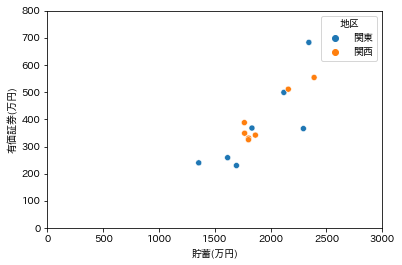

In [ ]:
print("層別散布図例")
plt.xlim(0, 3000)
plt.ylim(0, 800)
sns.scatterplot(x = '貯蓄(万円)', y = '有価証券(万円)', hue='地区', data = savings_data) 

# 相関係数  

**共分散**：2変数の関係の強さを測る指標  
x,yの観測値の組からなるデータを(x1,y2),...(xn,yn)として  
2変数の共分散Sxyは以下の式で定義される  
2変数それぞれの偏差を求め2変数を掛け合わせて総和をとり観測値のn個で割る  
共分散の**値が正なら**正の相関関係  
共分散の**値が負なら**負の相関関係  
共分散の**値が0に近いなら**無相関
**注意点**：変数の単位の影響を受けてしまう。正の相関が無相関になったりする
$$
Sxy=\frac{1}{n}
\sum_{i=1}^n{(x_i-\bar{x})}{(y_1-\bar{y})}
$$  
**相関係数**：標準偏差を求めることで単位の影響を受けずに相関関係を見つける  
xの標準偏差をSx,yの標準偏差をSyとし相関係数rを以下の式で定義する  
$$
r=\frac{
  \frac{1}{n}
\sum_{i=1}^n{(x_i-\bar{x})}{(y_1-\bar{y})}
}
{
\sqrt{\frac{1}{n}\sum_{i=1}^n{(x_i-\bar{x})^2}}
\sqrt{\frac{1}{n}\sum_{i=1}^n{(y_i-\bar{y})^2}}
}
=\frac{Sxy}{SxSy}
$$  
$$
相関係数=\frac{共分散}{xy標準偏差}
$$

# 相関係数の注意点  

**相関係数の注意点**：相関係数の値だけで2変数の関係を判断するのはダメ  
相関係数は直線的な関係を測る尺度であり2変数間の関係は必ずしも直線とは限らない  
**外れ値と相関関係**：データに外れ値がある場合は注意が必要。外れ値だけで係数が変動する  

# 相関と因果  

**因果関係**：原因と結果の関係。原因→結果(矢印は一方方向)  
**相関関係**：要素と要素がお互いに関係しあっている。要素→←要素(矢印は双方向)  
**相関関係の中に因果関係？**：相関関係の中に因果関係があるわけではない。  
お互いに関係しあっていても原因と結果の関係が必ず成り立つわけではない  
**偽相関**：2変数x,y両方に影響を与える第3の変数zがあり  
zのおかげでxとyの相関関係が成り立つ状況  


# **Part5**：回帰直線と予測  
# この章での目的  
説明変数と被説明変数を区別する  
回帰直線を用意て予測する  
最小二乗法の考え方を理解する  
回帰直線と相関係数の関係を理解する  
適切に回帰直線を用いる  

# 回帰分析  

**回帰分析**：変数xから変数yを予測すること  
**説明変数**：予測対象の元となるデータ。ここでは変数yを予測するのでxが説明変数    
**目的変数(被説明変数)**：予測対象。ここでは変数y  
**回帰直線**：直線の式
$$
y=\alpha+\beta x
$$  
この時のアルファとベータを**回帰係数**という  
**推定値**： 直線の式から求めたアルファとベータの値  
**予測値**：推定値を使って導き出された値  


In [ ]:
weight_data = pd.DataFrame({
    '回数': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'おもりの重さx(g)': [6, 8, 12, 14, 18, 20, 24, 26, 30, 32],
    'バネの長さy(mm)': [119, 145, 175, 191, 204, 209, 244, 233, 272, 268],
},
index = None
)
weight_data=weight_data.style.hide_index()#インデックスを隠す上手くプロットできない
print("おもりの重さとバネの長さ")
weight_data

おもりの重さとバネの長さ


回数,おもりの重さx(g),バネの長さy(mm)
1,6,119
2,8,145
3,12,175
4,14,191
5,18,204
6,20,209
7,24,244
8,26,233
9,30,272
10,32,268


おもりの重さとバネの長さの散布図


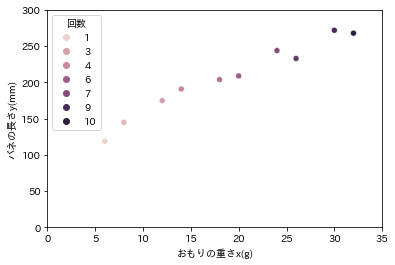

In [ ]:
print("おもりの重さとバネの長さの散布図")
weight_data_plot = pd.DataFrame({
    '回数': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'おもりの重さx(g)': [6, 8, 12, 14, 18, 20, 24, 26, 30, 32],
    'バネの長さy(mm)': [119, 145, 175, 191, 204, 209, 244, 233, 272, 268],
},
index = None
)
plt.xlim(0, 35)
plt.ylim(0, 300)
sns.scatterplot(x = 'おもりの重さx(g)', y = 'バネの長さy(mm)', hue = '回数', data = weight_data_plot)

# 最小二乗法  

**最小二乗法**：回帰係数アルファとベータを推定する方法  
(平均などを使って確からしい直線を引く)  
**残差(誤差)**：観測値yiと予測値y^iとの差  
**残差平方和**：残差をn個全部足す。この時マイナスの符号があると  
正しい計算ができないので2乗する。残差平方和は以下の式で定義する  
$$
(y_1-\hat{y_1})^2+(y_2-\hat{y_2})^2+....(y_n-\hat{y_n})^2
=\sum_{i=1}^n{(y_i-\hat{y_i})^2}
$$
**残差平方和の式に直線の式を代入する**  
$$
y=\hat{\alpha}+\hat{\beta}xと\sum_{i=1}^n{(y_i-\hat{y_i})^2}を合わせると
\sum_{i=1}^n{(y_i-\hat{\alpha}-\hat{\beta}x_i)^2}になる
$$  

モデル式で表すとこんな感じ。f(x)がyiと似ている数値になると残差が小さくなる  
例えば観測値(テストデータ)と予測値(モデルからの出力)が似ていると  
1-1=0  
2乗しても0なので残差も0
$$
\sum_{i=1}^n{(y_i-f(x))^2}
$$  
**正規方程式を使った回帰係数の推定**：  
$$
(傾き)\hat{\beta}=\frac{Sxy}{S^2x}(=rxy\frac{Sy}{Sx}),　　　　(切片)\hat{\alpha}=\bar{y}-\hat{\beta}\bar{x}
$$  
$$
\frac{Sxy(共分散)}{S^2x(分散)}
$$  
おもりの重さとバネの長さのデータについてこれらを求める  
$$
\hat{\beta}=\frac{401}{73}=5.5,　　　　\hat{\alpha}=206-5.5\times19=101.5
$$  
となる。これから回帰直線はy＝101.5+5.5xとなる  
これでおもりに対するバネの長さが予測できる  
おもりの重さが20gの場合  
バネの長さは  
$$
\hat{y}=101.5+5.5\times20=211.5(mm)
$$
211.5と予測される  
**残差を求める**  
おもりが30gの場合バネの長さの予測値と残差を求める  
$$
得られた回帰直線より\hat{y}=101.5+5.5\times30=266.5(mm)
$$  
$$
残差は272-266.5=5.5(mm)
$$  


# 例題  
貯蓄(万円)と所有有価証券(万円)について貯蓄をx有価証券をyとして  
yをxで予測する回帰直線を求めよ  
xの平均：1892.4  
S^2x分散：117604.2  
S^2y分散：23288.4  
yの平均：377.9  
Sxy共分散：42432.1  
rxy相関係数：0.811  
上記のいずれかを使用する  



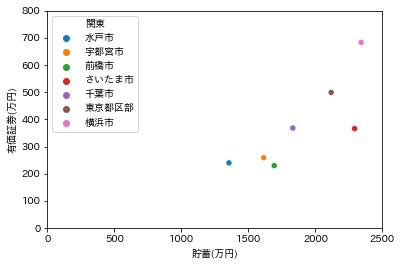

In [ ]:
saving_data = pd.DataFrame({
    '関東': ['水戸市', '宇都宮市', '前橋市', 'さいたま市', '千葉市', '東京都区部', '横浜市'],
    '貯蓄(万円)': [1355, 1614, 1693, 2293, 1832, 2118, 2342],
    '有価証券(万円)': [240, 259, 230, 366, 368, 499, 683],
},
index = None
)
plt.xlim(0, 2500)
plt.ylim(0, 800)
sns.scatterplot(x = '貯蓄(万円)', y = '有価証券(万円)', hue = '関東', data = saving_data)

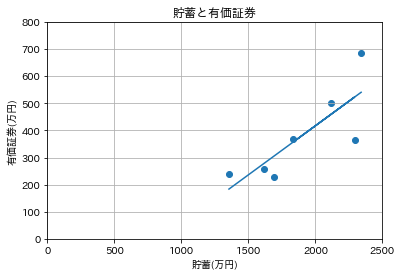

回帰係数=  [[0.36080382]]
切片=  [-304.9383215]
決定係数=  0.6573935763847886


In [ ]:
CLF = LinearRegression()
x = np.array([1355, 1614, 1693, 2293, 1832, 2118, 2342])
x = x.reshape(-1, 1)
y = np.array([240, 259, 230, 366, 368, 499, 683])
y = y.reshape(-1, 1)
CLF.fit(x, y)

plt.scatter(x, y)

# 回帰直線
plt.title('貯蓄と有価証券')
plt.plot(x, CLF.predict(x))
plt.xlabel('貯蓄(万円)')
plt.ylabel('有価証券(万円)')
plt.grid()
plt.xlim(0, 2500)
plt.ylim(0, 800)
plt.show()


print("回帰係数= ", CLF.coef_)
print("切片= ", CLF.intercept_)
print("決定係数= ", CLF.score(x, y))

# 答え  

正規方程式を解くと  
$$
\hat{\beta}=\frac{42432.1(共分散)}{117604.2(x分散)}=0.361(\hat{\beta},推定された傾き)
$$  
$$
\hat{\alpha}=377.9(y平均)-0.361(\hat{\beta},推定された傾き)\times1892.4(x平均)=-305.3(\hat{\alpha},推定された切片)
$$  
これらから回帰直線を導くと  
$$
y=-305.3(\hat{\alpha},推定された切片)+0.361(\hat{\beta},推定された傾き)\times (x)となる
$$  
xに数値を代入すると回帰直線を求めることができる!!  


# 回帰直線の注意点  

**外れ値がある場合**：外れ値の影響を受けるので求めた式の解釈には注意が必要  
**2変数間の関係が直線でない**：回帰直線よりも2次曲線の方が当てはまりが良い場合がある
**複数のグループが混在している**：回帰直線をグループごとに求める  
**変数同士を入れ替えてはいけない**：目的変数から説明変数を求めてはいけない。    
**データからかけ離れた値を入れて予測する**：データが分布する範囲からかけ離れた値を
入れて予測しても値に信憑性が無い。  
これを外挿と言う  

# 決定係数  

**決定係数**：求められた回帰直線の説明力を測る指標。寄与率とも言う。  
**総平方和**：変数yの散らばり具合  
$$
S_T=(y_1-\bar{y})^2+(y_2-\bar{y})^2+....+(y_n-\bar{y})^2=\sum_{i=1}^n{(y_1-\bar{y})^2}
$$  
**回帰による平方和**：回帰直線によって説明できた部分  
$$
S_R=(\hat{y_1}-\bar{y})^2+(\hat{y_2}-\bar{y})^2+....+(\hat{y_n}-\bar{y})^2+
\sum_{i=1}^n{(\hat{y}_i-\bar{y})^2}
$$  
**残差平方和**：回帰直線によって説明できなかった部分  
$$
S_e=(y_1-\hat{y}_1)^2+(y_2-\hat{y}_2)^2+....+(y_n-\hat{y}_n)^2+
\sum_{i=1}^n{(y_i-\hat{y}_i)^2}
$$  
**最終的にはこうなる↓**  
$$
総平方和(S_T)=回帰による平方和(S_R)+残差平方和(S_e)
$$  
$$
決定係数R^2 = \frac{S_R}{S_T}
$$  
決定係数は**0から1の値**を取る。1に近いほど分析が有効だといえる  
$$  
S_e=0,S_T=S_R,R^2=1になる  
$$  
**決定係数は重相関係数の2乗の関係**  
回帰分析(単回帰)のみ決定係数と相関係数rの間にR^2=r^2が成り立つ  
**重相関係数(重回帰)**複数の変数(線形結合)を用意て回帰分析を行った時の相関係数  
重回帰分析の場合、目的変数の論理値と実測値との間の相関係数  


